In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parameters
mean = 30
stdev = 1
sample_size = 1

# Generate random samples
sample = np.random.normal(mean, stdev, sample_size)[0]
print(sample)

27.74378962288108


In [ ]:
def linear_death_probability(t, tmax, initialProb):
    """
    Calculates death probability using y = mx + b form.
    
    Parameters:
    - t (int): Current time step
    - tmax (int): Time step at which death probability reaches 1
    - initialProb (float): Death probability at t = 0
    
    Returns:
    - float: Probability of death at time t
    """
    if t <= 0:
        return initialProb
    elif t >= tmax:
        return 1.0
    else:
        m = (1.0 - initialProb) / tmax
        return m * t + initialProb

# Example usage
tmax = 5
initialProb = 0.01

for t in range(0, tmax + 2):  # One extra step to show saturation
    print(f"Time {t}: p_death = {linear_death_probability(t, tmax, initialProb):.2f}")



Time 0: p_death = 0.01
Time 1: p_death = 0.21
Time 2: p_death = 0.41
Time 3: p_death = 0.60
Time 4: p_death = 0.80
Time 5: p_death = 1.00
Time 6: p_death = 1.00


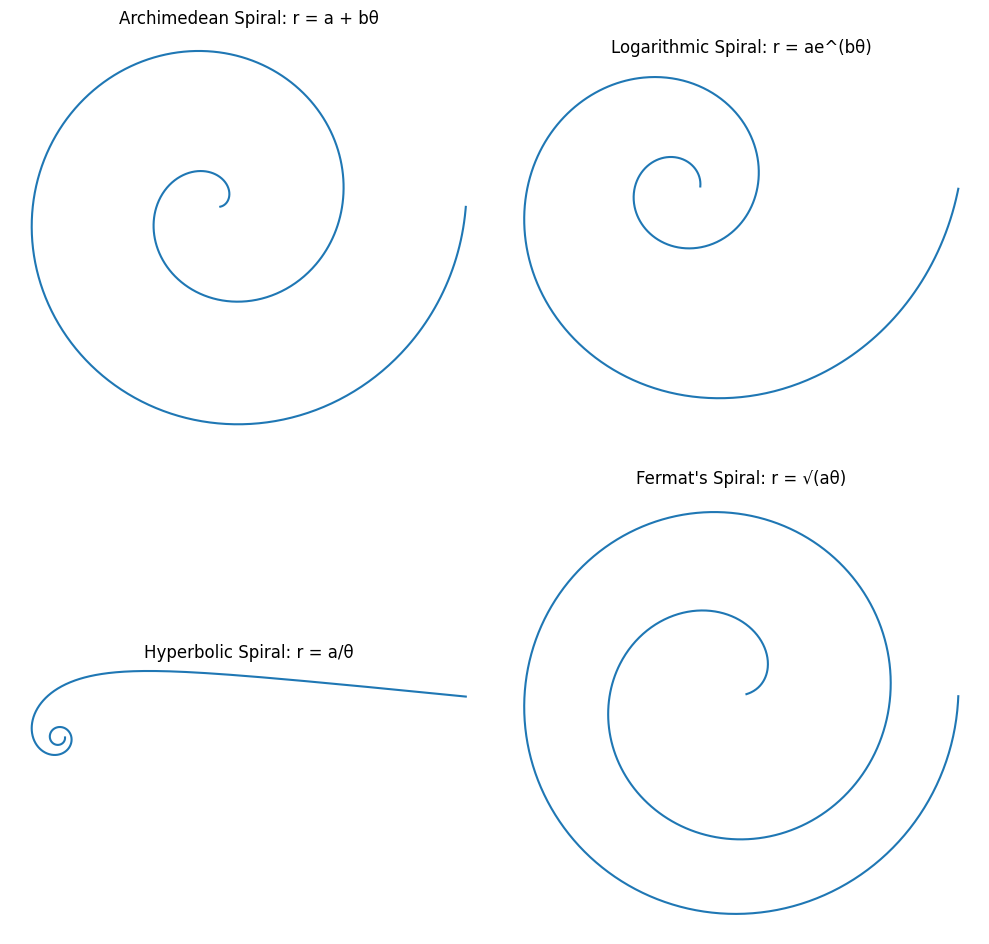

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Avoid division by zero — start from a moderate theta
theta = np.linspace(0.1, 4 * np.pi, 1000)
theta_1 = np.linspace(0.1, 2 * np.pi, 1000)

# Spiral functions
def archimedeanSpiral(a, b, theta):
    return a + b * theta

def logarithmicSpiral(a, b, theta):
    return a * np.exp(b * theta)

def hyperbolicSpiral(a, theta):
    return a / theta

def fermatSpiral(a, theta):
    return np.sqrt(a * theta)

# Parameters
a = 1
b = 0.2

# r values
rArch = archimedeanSpiral(0, b, theta)
rLog = logarithmicSpiral(a, b, theta)
rHyp = hyperbolicSpiral(a, theta_1)  # smaller scaling helps
rFermat = fermatSpiral(a, theta)

# Polar to Cartesian
def polarToCartesian(r, theta):
    return r * np.cos(theta), r * np.sin(theta)

xArch, yArch = polarToCartesian(rArch, theta)
xLog, yLog = polarToCartesian(rLog, theta)
xHyp, yHyp = polarToCartesian(rHyp, theta)
xFermat, yFermat = polarToCartesian(rFermat, theta)

# Plot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].plot(xArch, yArch)
axs[0, 0].set_title("Archimedean Spiral: r = a + bθ")

axs[0, 1].plot(xLog, yLog)
axs[0, 1].set_title("Logarithmic Spiral: r = ae^(bθ)")

axs[1, 0].plot(xHyp, yHyp)
axs[1, 0].set_title("Hyperbolic Spiral: r = a/θ")

axs[1, 1].plot(xFermat, yFermat)
axs[1, 1].set_title("Fermat's Spiral: r = √(aθ)")

for ax in axs.flat:
    ax.set_aspect("equal")
    ax.axis("off")

plt.tight_layout()
plt.show()


In [2]:
def bounded_exponential_wait_time(hazard_rate, steps_per_year, min_steps, max_steps):
    """
    Samples a waiting time from an exponential distribution but ensures it falls within a reasonable range.

    Parameters:
    - hazard_rate (float): Hazard rate per year.
    - steps_per_year (int): Number of simulation steps per year.
    - min_steps (int): Minimum number of steps before an event.
    - max_steps (int): Maximum number of steps before an event.

    Returns:
    - int: The number of time steps until the next event.
    """
    if hazard_rate <= 0:
        return np.inf  # No event occurs if hazard rate is zero or negative

    wait_time = int(np.random.exponential(scale=1 / hazard_rate) * steps_per_year)
    
    # Ensure the wait time stays within a reasonable range
    return int(min(max(wait_time, min_steps), max_steps))

In [3]:
steps_per_year = 24*365
max_age = 6*steps_per_year
hazard_rate = 1/6
reproductive_maturity = 1* steps_per_year
exponential_wait_time = bounded_exponential_wait_time(hazard_rate=hazard_rate, steps_per_year=steps_per_year, min_steps = 0, max_steps = max_age)
rand_age = int(np.random.uniform(0,max_age*steps_per_year))
# print(rand_age/steps_per_year)
print(exponential_wait_time/steps_per_year)

0.816324200913242


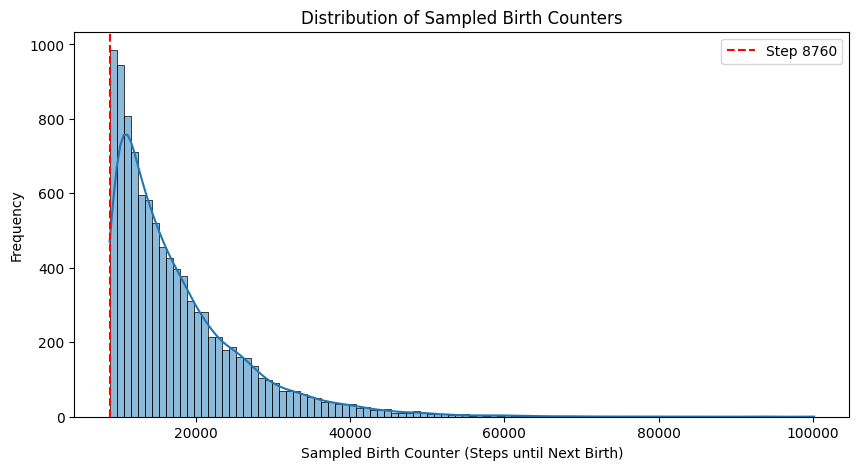

In [6]:
# Re-import necessary libraries since execution state was reset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the function to be tested
def bounded_exponential_wait_time(hazard_rate, steps_per_year, min_steps, max_steps=None):
    """
    Samples a waiting time from an exponential distribution but ensures it falls within a reasonable range.

    Parameters:
    - hazard_rate (float): Hazard rate per year.
    - steps_per_year (int): Number of simulation steps per year.
    - min_steps (int): Minimum number of steps before an event.
    - max_steps (int): Maximum number of steps before an event.

    Returns:
    - int: The number of time steps until the next event.
    """
    if hazard_rate <= 0:
        return np.inf  # No event occurs if hazard rate is zero or negative

    # Sample from exponential and shift the minimum before applying bounds
    raw_wait_time = np.random.exponential(scale=1 / hazard_rate) * steps_per_year
    shifted_wait_time = min_steps + raw_wait_time  # Ensures a minimum wait time
    if max_steps:
        return int(np.clip(shifted_wait_time, min_steps, max_steps))
    else:
        return int(shifted_wait_time)


# Define test parameters
test_hazard_rate = 1  # Example hazard rate for birth events
test_steps_per_year = 8760  # Simulation steps per year
test_min_steps = 8760  # Minimum wait time to prevent immediate births
test_max_steps = None#20 * test_steps_per_year  # Cap maximum wait time at 10 years

# Sample from the function multiple times to analyze the distribution , test_max_steps
num_samples = 10000  # Number of samples to test

# Generate samples using the function
sampled_wait_times = [
    bounded_exponential_wait_time(test_hazard_rate, test_steps_per_year, test_min_steps)
    for _ in range(num_samples)
]

# Plot the distribution of sampled wait times
plt.figure(figsize=(10, 5))
sns.histplot(sampled_wait_times, bins=100, kde=True, edgecolor="black")
plt.axvline(test_steps_per_year, color="red", linestyle="--", label="Step 8760")
plt.xlabel("Sampled Birth Counter (Steps until Next Birth)")
plt.ylabel("Frequency")
plt.title("Distribution of Sampled Birth Counters")
plt.legend()
plt.show()


In [ ]:
max_age = 5                       # maximum age in years
steps_per_year = 24 * 365         # simulation steps per year
hazard_rate = 1                 # hazard rate per year

# Number of simulation samples
n_samples = 10000

# Generate uniform random ages:
# Here, a random age is drawn as an integer number of steps from 0 to max_age * steps_per_year,
# then converted into years by dividing by steps_per_year.
rand_age_years = np.array([
    int(np.random.uniform(0, max_age * steps_per_year)) / steps_per_year
    for _ in range(n_samples)
])

# Generate exponential wait times:
# Each waiting time is sampled in steps and then converted to years.
exponential_wait_years = np.array([
    sample_exponential_wait_time(hazard_rate, steps_per_year) / steps_per_year
    for _ in range(n_samples)
])

# Plot histograms for both distributions
plt.figure(figsize=(12, 5))

# Histogram for uniform age distribution
plt.subplot(1, 2, 1)
plt.hist(rand_age_years, bins=50, color='blue', alpha=0.7)
plt.title("Uniform Distribution of Age (years)")
plt.xlabel("Age (years)")
plt.ylabel("Frequency")

# Histogram for exponential wait times
plt.subplot(1, 2, 2)
plt.hist(exponential_wait_years, bins=50, color='green', alpha=0.7)
plt.title("Exponential Waiting Time (years)")
plt.xlabel("Time (years)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

NameError: name 'sample_exponential_wait_time' is not defined

In [5]:
import time
import numpy as np
from scipy.special import softmax

class SoftmaxLookupTableGenerator:
    def __init__(self, min_utility=0, max_utility=1, step=0.05, temperature=1.0, decimal_places=2):
        self.min_utility = min_utility
        self.max_utility = max_utility
        self.step = step
        self.temperature = temperature
        self.decimal_places = decimal_places
        self.utilities = np.arange(min_utility, max_utility + step, step)

    def round_to_step(self, value):
        return round(round(value / self.step) * self.step, self.decimal_places)

    def mask_zero_utilities(self, utilities):
        return np.where(utilities == 0, -np.inf, utilities)

    def lookup_generator(self):
        for u1 in self.utilities:
            for u2 in self.utilities:
                for u3 in self.utilities:
                    key = (self.round_to_step(u1), self.round_to_step(u2), self.round_to_step(u3))
                    utilities = np.array([u1, u2, u3])
                    masked_utilities = self.mask_zero_utilities(utilities)
                    probabilities = softmax(masked_utilities / self.temperature)
                    yield key, probabilities

    def get_probabilities(self, utilities):
        key = tuple(self.round_to_step(u) for u in utilities)
        for k, probs in self.lookup_generator():
            if k == key:
                return probs
        return softmax(self.mask_zero_utilities(np.array(utilities)) / self.temperature)  # Fallback
# Timing the execution of the lookup table creation
start_time_1 = time.time()
softmax_table = SoftmaxLookupTable()
end_time_1 = time.time()

execution_time_1 = end_time_1 - start_time_1
u = [0.5, 0.75, 0.5]
start_time_2 = time.time()

print(softmax_table.get_probabilities(utilities=u))
end_time_2 = time.time()
execution_time_2 = end_time_2 - start_time_2
print(execution_time_1)
print(execution_time_2)


[0.30450434 0.39099132 0.30450434]
0.19172334671020508
0.0004394054412841797


/home/mremington/anaconda3/envs/therma_sim/lib/python3.11/site-packages/scipy/special/_logsumexp.py:224: RuntimeWarning: invalid value encountered in subtract
  exp_x_shifted = np.exp(x - x_max)


In [28]:
time_until_birth = np.random.exponential(scale=8760 / 1)  # Average 2 births per year
print(time_until_birth)

2277.478413143392


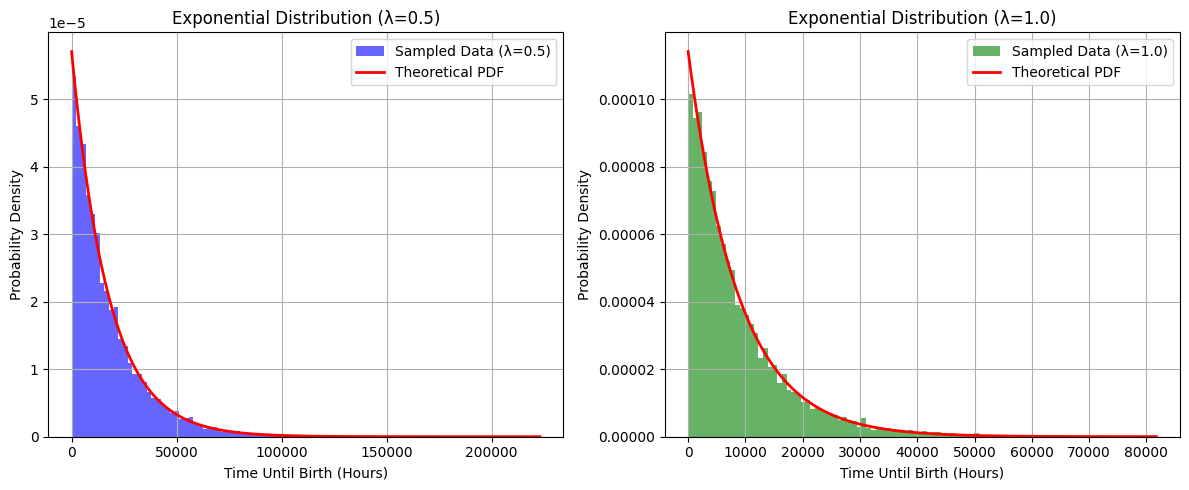

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for two different hazard rates
hazard_rate_1 = 0.5  # Expected 2 births per year
hazard_rate_2 = 1.0  # Expected 1 birth per year (higher hazard rate means shorter wait times)

scale_1 = 8760 / hazard_rate_1  # Convert to hours
scale_2 = 8760 / hazard_rate_2  # Convert to hours

num_samples = 10000  # Number of samples

# Sample from exponential distribution for both hazard rates
wait_times_1 = np.random.exponential(scale=scale_1, size=num_samples)
wait_times_2 = np.random.exponential(scale=scale_2, size=num_samples)

# Create a 1x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the PDF for the first hazard rate
axes[0].hist(wait_times_1, bins=100, density=True, alpha=0.6, color='b', label=f"Sampled Data (λ={hazard_rate_1})")
x_1 = np.linspace(0, max(wait_times_1), 1000)
pdf_1 = (1 / scale_1) * np.exp(-x_1 / scale_1)  # Exponential PDF formula
axes[0].plot(x_1, pdf_1, 'r-', label="Theoretical PDF", linewidth=2)
axes[0].set_xlabel("Time Until Birth (Hours)")
axes[0].set_ylabel("Probability Density")
axes[0].set_title(f"Exponential Distribution (λ={hazard_rate_1})")
axes[0].legend()
axes[0].grid(True)

# Plot the PDF for the second hazard rate
axes[1].hist(wait_times_2, bins=100, density=True, alpha=0.6, color='g', label=f"Sampled Data (λ={hazard_rate_2})")
x_2 = np.linspace(0, max(wait_times_2), 1000)
pdf_2 = (1 / scale_2) * np.exp(-x_2 / scale_2)  # Exponential PDF formula
axes[1].plot(x_2, pdf_2, 'r-', label="Theoretical PDF", linewidth=2)
axes[1].set_xlabel("Time Until Birth (Hours)")
axes[1].set_ylabel("Probability Density")
axes[1].set_title(f"Exponential Distribution (λ={hazard_rate_2})")
axes[1].legend()
axes[1].grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


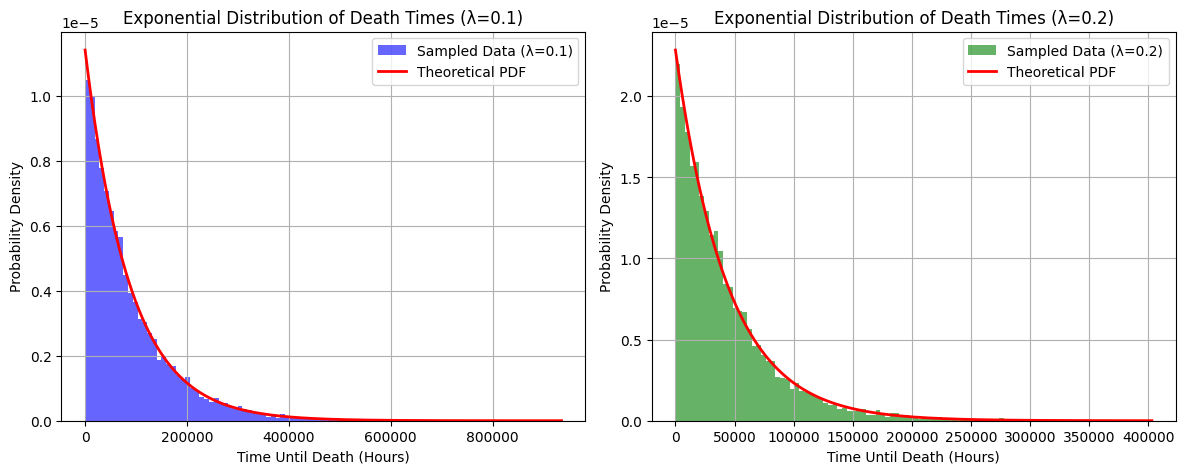

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for two different death hazard rates
death_hazard_rate_1 = 1/10 # Expected 10-year lifespan
death_hazard_rate_2 = 1/5  # Expected 5-year lifespan (higher hazard rate means shorter life)

scale_death_1 = 8760 / death_hazard_rate_1  # Convert to hours
scale_death_2 = 8760 / death_hazard_rate_2  # Convert to hours

num_samples = 10000  # Number of samples

# Sample from exponential distribution for both death hazard rates
death_times_1 = np.random.exponential(scale=scale_death_1, size=num_samples)
death_times_2 = np.random.exponential(scale=scale_death_2, size=num_samples)

# Create a 1x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the PDF for the first death hazard rate
axes[0].hist(death_times_1, bins=100, density=True, alpha=0.6, color='b', label=f"Sampled Data (λ={death_hazard_rate_1})")
x_death_1 = np.linspace(0, max(death_times_1), 1000)
pdf_death_1 = (1 / scale_death_1) * np.exp(-x_death_1 / scale_death_1)  # Exponential PDF formula
axes[0].plot(x_death_1, pdf_death_1, 'r-', label="Theoretical PDF", linewidth=2)
axes[0].set_xlabel("Time Until Death (Hours)")
axes[0].set_ylabel("Probability Density")
axes[0].set_title(f"Exponential Distribution of Death Times (λ={death_hazard_rate_1})")
axes[0].legend()
axes[0].grid(True)

# Plot the PDF for the second death hazard rate
axes[1].hist(death_times_2, bins=100, density=True, alpha=0.6, color='g', label=f"Sampled Data (λ={death_hazard_rate_2})")
x_death_2 = np.linspace(0, max(death_times_2), 1000)
pdf_death_2 = (1 / scale_death_2) * np.exp(-x_death_2 / scale_death_2)  # Exponential PDF formula
axes[1].plot(x_death_2, pdf_death_2, 'r-', label="Theoretical PDF", linewidth=2)
axes[1].set_xlabel("Time Until Death (Hours)")
axes[1].set_ylabel("Probability Density")
axes[1].set_title(f"Exponential Distribution of Death Times (λ={death_hazard_rate_2})")
axes[1].legend()
axes[1].grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


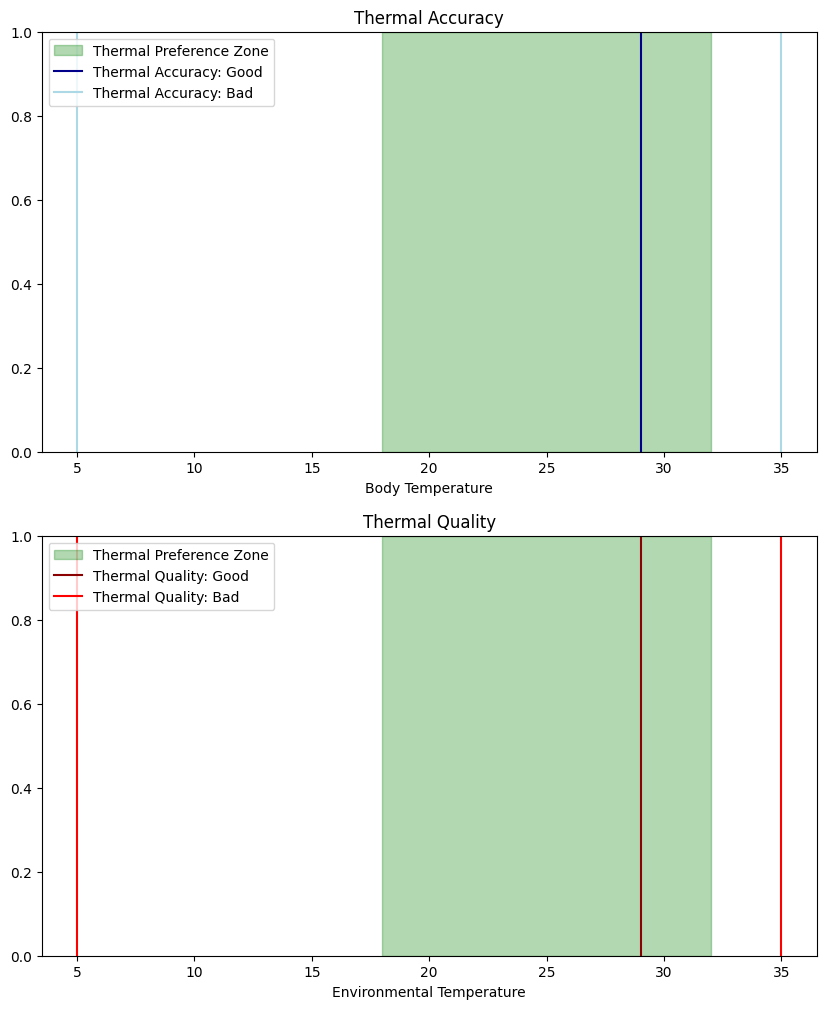

In [10]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(10, 12))



axs[0].axvspan(18, 32, color='green', alpha=0.3, label='Thermal Preference Zone')
axs[0].axvline(x=29, color='darkblue', linestyle='-', label='Thermal Accuracy: Good')
axs[0].axvline(x=35, color='lightblue', linestyle='-', label='Thermal Accuracy: Bad')
axs[0].axvline(x=5, color='lightblue', linestyle='-')
axs[0].set_xlabel("Body Temperature")
axs[0].set_title("Thermal Accuracy")
axs[0].legend()




# Bottom plot: Thermal accuracy plot

axs[1].axvspan(18, 32, color='green', alpha=0.3, label='Thermal Preference Zone')
axs[1].axvline(x=29, color='darkred', linestyle='-', label='Thermal Quality: Good')
axs[1].axvline(x=35, color='red', linestyle='-', label='Thermal Quality: Bad')
axs[1].axvline(x=5, color='red', linestyle='-')
axs[1].set_xlabel("Environmental Temperature")
axs[1].set_title("Thermal Quality")
axs[1].legend()




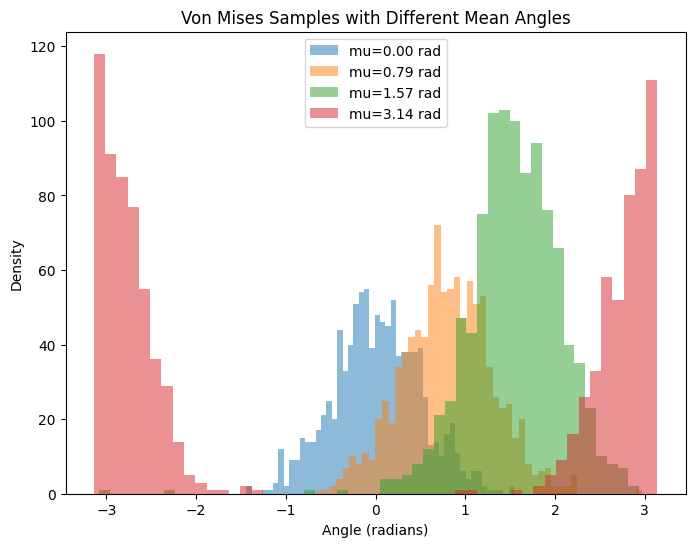

In [3]:
# Generate samples with different mean angles
mu_values = [0, np.pi/4, np.pi/2, np.pi]
kappa = 5  # Moderate concentration

plt.figure(figsize=(8, 6))
for mu in mu_values:
    samples = np.random.vonmises(mu, kappa, size=1000)
    plt.hist(samples, bins=50, alpha=0.5, label=f"mu={mu:.2f} rad")

plt.title("Von Mises Samples with Different Mean Angles")
plt.xlabel("Angle (radians)")
plt.ylabel("Density")
plt.legend()
plt.show()

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Functions
def kappa_function(distance, min_kappa=0.01):
    return min_kappa * math.exp(distance)

def euclidean_distance(current_position, destination_pos):
    curr_x, curr_y = current_position
    dest_x, dest_y = destination_pos
    return math.sqrt((dest_x - curr_x)**2 + (dest_y - curr_y)**2)

def angle_between_points(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.atan2(y2 - y1, x2 - x1)

def b_line_move(current_direction):
    return np.random.vonmises(mu=current_direction, kappa=100)

def forage_move(current_direction):
    return np.random.vonmises(mu=current_direction, kappa=0.01)

# Patch positions
patches = {'patch_1': (50, 50),
           'patch_2': (50, -50),
           'patch_3': (-50, -50),
           'patch_4': (-50, 50)}


# Functions
def kappa_function(distance, min_kappa=0.01):
    return min_kappa * np.exp(distance)

def euclidean_distance(current_position, destination_pos):
    return np.linalg.norm(np.array(destination_pos) - np.array(current_position))

def angle_between_points(point1, point2):
    delta = np.array(point2) - np.array(point1)
    return np.arctan2(delta[1], delta[0])

def b_line_move(current_direction, kappa=10):
    return np.random.vonmises(mu=current_direction, kappa=kappa)

def forage_move(current_direction, kappa=0.01):
    return np.random.vonmises(mu=current_direction, kappa=kappa)

def vectorized_movement(start_pos, patches, steps_per_patch=25):
    trajectory = [np.array(start_pos, dtype=float)]
    current_pos = np.array(start_pos, dtype=float)

    for patch_name, patch_pos in patches.items():
        # Move in a beeline toward the patch
        while euclidean_distance(current_pos, patch_pos) > 1:
            direction = angle_between_points(current_pos, patch_pos)
            move_angle = b_line_move(direction)
            move_vector = np.array([np.cos(move_angle), np.sin(move_angle)])
            current_pos += move_vector
            trajectory.append(current_pos.copy())
        
        # Forage within the patch
        for _ in range(steps_per_patch):
            forage_angle = forage_move(direction)
            move_vector = np.array([np.cos(forage_angle), np.sin(forage_angle)])
            current_pos += move_vector
            trajectory.append(current_pos.copy())

    return np.array(trajectory)

start_position = (0, 0)
# Patch positions
patches = {
    'patch_1': (50, 50),
    'patch_2': (50, -50),
    'patch_3': (-50, -50),
    'patch_4': (-50, 50),
    'home': start_position
}

# Simulate movement

path = vectorized_movement(start_position, patches)

# Plot the movement
plt.figure(figsize=(10, 10))
plt.plot(path[:, 0], path[:, 1], marker='o', markersize=2, linestyle='-', color='k')
plt.scatter(*zip(*patches.values()), color='r', s=100, label='Patches')
plt.scatter(start_position[0], start_position[1], color='g', s=100, label='Home')
plt.title("Movement Trajectory")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


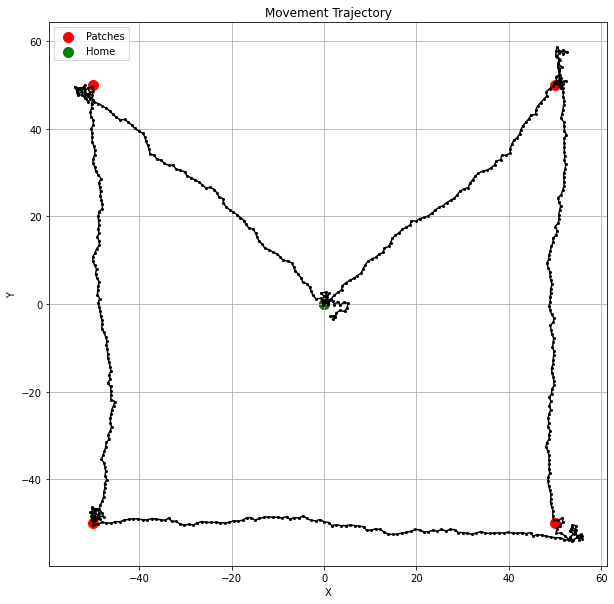

In [10]:
# Functions
def kappa_function(distance, min_kappa=0.01):
    return min_kappa * np.exp(distance)

def euclidean_distance(current_position, destination_pos):
    return np.linalg.norm(np.array(destination_pos) - np.array(current_position))

def angle_between_points(point1, point2):
    delta = np.array(point2) - np.array(point1)
    return np.arctan2(delta[1], delta[0])

def b_line_move(current_direction, kappa=10):
    return np.random.vonmises(mu=current_direction, kappa=kappa)

def forage_move(current_direction, kappa=0.01):
    return np.random.vonmises(mu=current_direction, kappa=kappa)

def vectorized_movement(start_pos, patches, steps_per_patch=25):
    trajectory = [np.array(start_pos, dtype=float)]
    current_pos = np.array(start_pos, dtype=float)

    for patch_name, patch_pos in patches.items():
        # Move in a beeline toward the patch
        while euclidean_distance(current_pos, patch_pos) > 1:
            direction = angle_between_points(current_pos, patch_pos)
            move_angle = b_line_move(direction)
            move_vector = np.array([np.cos(move_angle), np.sin(move_angle)])
            current_pos += move_vector
            trajectory.append(current_pos.copy())
        
        # Forage within the patch
        for _ in range(steps_per_patch):
            forage_angle = forage_move(direction)
            move_vector = np.array([np.cos(forage_angle), np.sin(forage_angle)])
            current_pos += move_vector
            trajectory.append(current_pos.copy())

    return np.array(trajectory)

start_position = (0, 0)
# Patch positions
patches = {
    'patch_1': (50, 50),
    'patch_2': (50, -50),
    'patch_3': (-50, -50),
    'patch_4': (-50, 50),
    'home': start_position
}

# Simulate movement

path = vectorized_movement(start_position, patches)

# Plot the movement
plt.figure(figsize=(10, 10))
plt.plot(path[:, 0], path[:, 1], marker='o', markersize=2, linestyle='-', color='k')
plt.scatter(*zip(*patches.values()), color='r', s=100, label='Patches')
plt.scatter(start_position[0], start_position[1], color='g', s=100, label='Home')
plt.title("Movement Trajectory")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()




In [3]:
class Rattlesnake(object):
    def __init__(self) -> None:
        pass

agent = Rattlesnake()
print(agent.__class__.__name__)

Rattlesnake


4.492880555928207


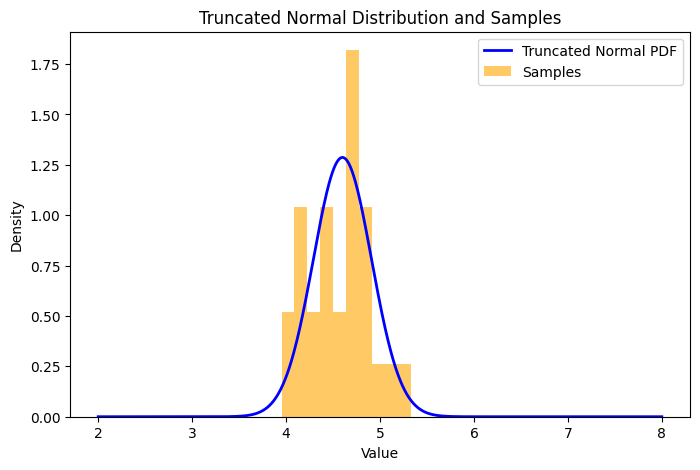

In [5]:
from scipy.stats import truncnorm

mean = 4.6
std_dev = 0.31
n = 28
lower_bound = 2  # Minimum value
upper_bound = 8  # Maximum value

# Truncated normal distribution
a, b = (lower_bound - mean) / std_dev, (upper_bound - mean) / std_dev
# Truncated normal distribution
x = np.linspace(lower_bound, upper_bound, 1000)  # Points for plotting the PDF
pdf = truncnorm.pdf(x, a, b, loc=mean, scale=std_dev)  # Calculate PDF
samples = truncnorm.rvs(a, b, loc=mean, scale=std_dev, size=n)
print(truncnorm.rvs(a, b, loc=mean, scale=std_dev, size=1)[0])
# Plotting
plt.figure(figsize=(8, 5))

# Plot PDF
plt.plot(x, pdf, label="Truncated Normal PDF", color="blue", linewidth=2)

# Plot histogram of samples
plt.hist(samples, bins=10, density=True, alpha=0.6, color="orange", label="Samples")

# Add labels and legend
plt.title("Truncated Normal Distribution and Samples")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.show()

In [ ]:
print(np.random.uniform(0,1))

0.38240665429704646


In [10]:
fp = 'Data/Nebraska_data.csv'
df = pd.read_csv(fp, header=0)
df.head(10)


,year,month,day,hour,Study_Site,Burrow_mean_Temperature,Burrow_stddev_Temperature,Open_mean_Temperature,Open_stddev_Temperature,Shrub_mean_Temperature,Shrub_stddev_Temperature,DateTime,Mean_StdDev
0,2022,5,29,20,Nebraska,25.961,4.435334,23.389,1.032376,22.1160,0.066468,2022-05-29 20:00:00,4.435334
1,2022,5,29,21,Nebraska,24.461,2.496843,20.887,1.033790,20.6155,0.065761,2022-05-29 21:00:00,2.496843
2,2022,5,29,22,Nebraska,23.461,1.404888,19.886,0.326683,20.1145,0.065761,2022-05-29 22:00:00,1.404888
3,2022,5,29,23,Nebraska,13.472,1.094737,13.374,0.376181,13.3530,0.417193,2022-05-29 23:00:00,1.094737
4,2022,5,30,1,Nebraska,15.968,1.052268,14.376,0.332340,13.8545,0.417900,2022-05-30 01:00:00,1.052268
5,2022,5,30,2,Nebraska,16.467,1.118083,14.626,0.685894,14.3555,0.417900,2022-05-30 02:00:00,1.118083
6,2022,5,30,3,Nebraska,16.966,1.121328,14.626,0.685894,14.6060,0.772161,2022-05-30 03:00:00,1.121328
7,2022,5,30,4,Nebraska,16.966,1.439962,14.376,0.332340,14.3555,0.417900,2022-05-30 04:00:00,1.439962
8,2022,5,30,5,Nebraska,16.467,1.723898,14.376,0.332340,14.3555,0.417900,2022-05-30 05:00:00,1.723898
9,2022,5,30,6,Nebraska,16.467,1.817992,13.875,0.332340,14.1050,0.063640,2022-05-30 06:00:00,1.817992


In [11]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Get the minimum and maximum date
min_date = df['datetime'].min()
max_date = df['datetime'].max()

print("Minimum date:", min_date)
print("Maximum date:", max_date)

Minimum date: 2022-05-29 20:00:00
Maximum date: 2023-07-02 00:00:00


In [14]:
365 * 24

8760

In [13]:
yearly_counts = df.groupby('year').size()
total_hours = yearly_counts.sum()

if total_hours >= 365 * 24:
    print("You have a complete 365 days' worth of data across the two years.")
else:
    print(f"You have {total_hours} hours, which is not a full 365 days.")


You have 8190 hours, which is not a full 365 days.


In [16]:
df['Shrub_stddev_Temperature'].iloc[0]

0.4930000000000012

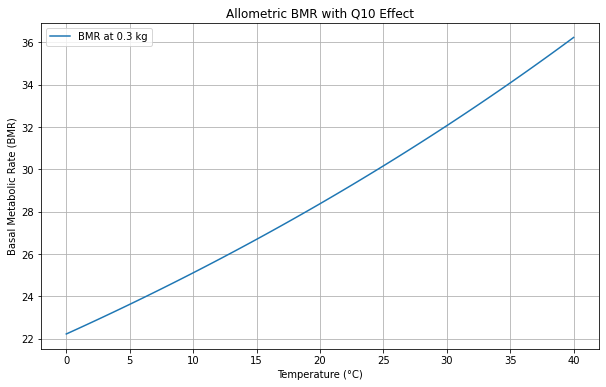

In [5]:
def allometric_bmr(mass, tref, temp, a=70, b=0.75, q10=2):
    """
    Calculate the BMR based on mass, temperature reference, and current temperature using allometric scaling.
    
    Parameters:
    mass (float): Body mass (kg)
    tref (float): Reference temperature (°C)
    temp (float): Current temperature (°C)
    a (float): Normalization constant
    b (float): Scaling exponent
    q10 (float): Q10 temperature coefficient

    Returns:
    float: Basal metabolic rate (BMR)
    """
    return a * mass**b * q10**((temp - tref) / 10)

# Example parameters
mass = 0.3  # kg
tref = 20  # °C
q10 = 1.13
temp_range = np.linspace(0, 40, 100)  # Temperature range from 0 to 40°C

# Calculate BMR for the given mass over the temperature range
bmr_values = [allometric_bmr(mass, tref, temp,q10=q10) for temp in temp_range]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(temp_range, bmr_values, label=f'BMR at {mass} kg')
plt.xlabel('Temperature (°C)')
plt.ylabel('Basal Metabolic Rate (BMR)')
plt.title('Allometric BMR with Q10 Effect')
plt.legend()
plt.grid(True)
plt.show()

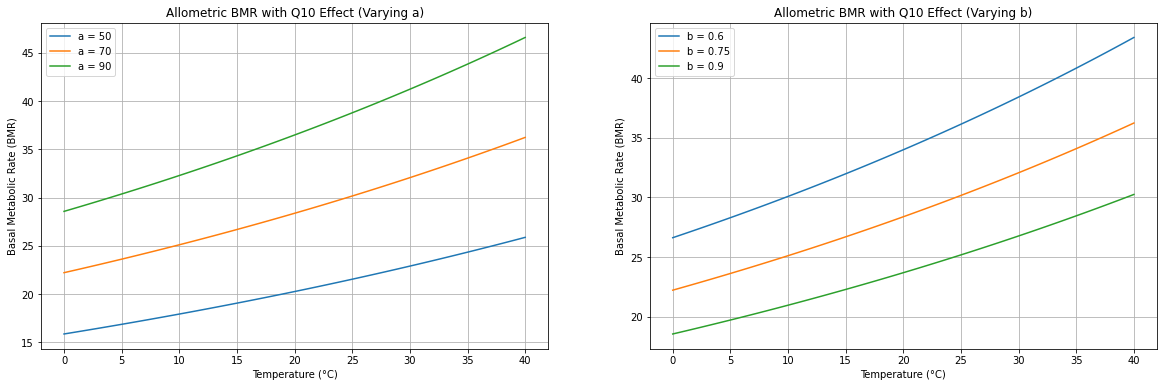

In [6]:


fig, axs = plt.subplots(1, 2, figsize=(20, 6))



# Varying a (alpha)

a_values = [50, 70, 90]

for a in a_values:

    smr_values = [allometric_smr(mass, tref, temp, a=a, q10=q10) for temp in temp_range]

    axs[0].plot(temp_range, smr_values, label=f'a = {a}')

axs[0].set_xlabel('Temperature (°C)')

axs[0].set_ylabel('Basal Metabolic Rate (BMR)')

axs[0].set_title('Allometric BMR with Q10 Effect (Varying a)')

axs[0].legend()

axs[0].grid(True)



# Varying b (beta)

b_values = [0.6, 0.75, 0.9]

for b in b_values:

    bmr_values = [allometric_bmr(mass, tref, temp, b=b, q10=q10) for temp in temp_range]

    axs[1].plot(temp_range, bmr_values, label=f'b = {b}')

axs[1].set_xlabel('Temperature (°C)')

axs[1].set_ylabel('Basal Metabolic Rate (BMR)')

axs[1].set_title('Allometric BMR with Q10 Effect (Varying b)')

axs[1].legend()

axs[1].grid(True)



plt.show()

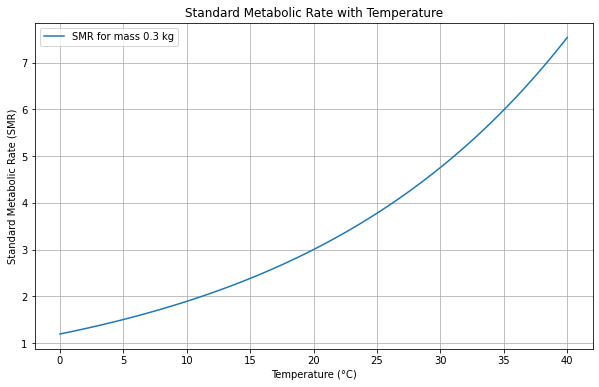

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_smr(log_mass, temperature, X1, X2, X3):
    """
    Calculate SMR based on log-mass, temperature, and constants X1, X2, X3.
    
    Parameters:
    log_mass (float): Logarithm (base 10) of body mass
    temperature (float): Ambient temperature (°C)
    X1 (float): Constant X1
    X2 (float): Temperature coefficient
    X3 (float): Constant X3

    Returns:
    float: Standard Metabolic Rate (SMR)
    """
    log_smr = X1 + log_mass + X2 * temperature + X3
    return 10**log_smr

# Example parameters
log_mass = np.log10(0.3)  # Logarithm of body mass (0.3 kg)
temperature_range = np.linspace(0, 40, 100)  # Temperature range from 0 to 40°C
X1 = 0.5
X2 = 0.02
X3 = 0.1

# Calculate SMR over the temperature range
smr_values = [calculate_smr(log_mass, temp, X1, X2, X3) for temp in temperature_range]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(temperature_range, smr_values, label=f'SMR for mass 0.3 kg')
plt.xlabel('Temperature (°C)')
plt.ylabel('Standard Metabolic Rate (SMR)')
plt.title('Standard Metabolic Rate with Temperature')
plt.legend()
plt.grid(True)
plt.show()

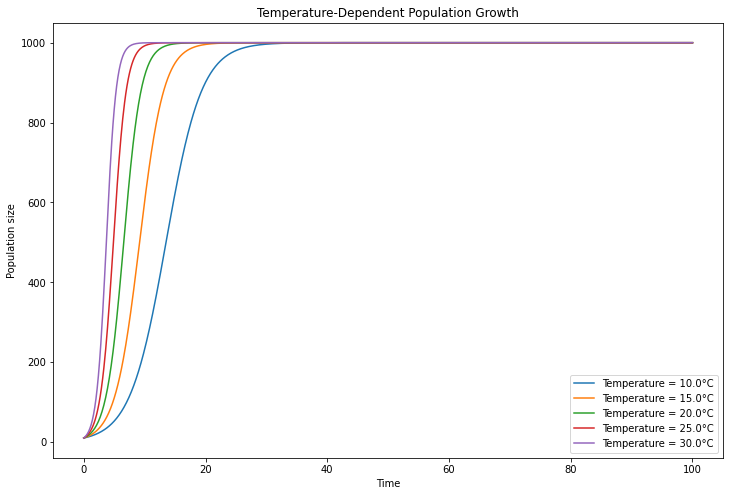

In [12]:
from scipy.integrate import odeint
K = 1000  # Carrying capacity
a, b, c, d = 0.1, 0.02, 0.0003, 0.00001  # Coefficients for polynomial regression model

def growth_rate(T):
    return a + b*T + c*T**2 + d*T**3

def population_growth(N, t, T):
    r_T = growth_rate(T)
    return r_T * N * (1 - N / K)

# Initial population size
N0 = 10

# Time points
t = np.linspace(0, 100, 1000)

# Temperatures to simulate
temperatures = np.linspace(10, 30, 5)  # Example range of temperatures

# Plot results for each temperature
plt.figure(figsize=(12, 8))

for T in temperatures:
    N = odeint(population_growth, N0, t, args=(T,))
    plt.plot(t, N, label=f'Temperature = {T}°C')

plt.xlabel('Time')
plt.ylabel('Population size')
plt.title('Temperature-Dependent Population Growth')
plt.legend()
plt.show()


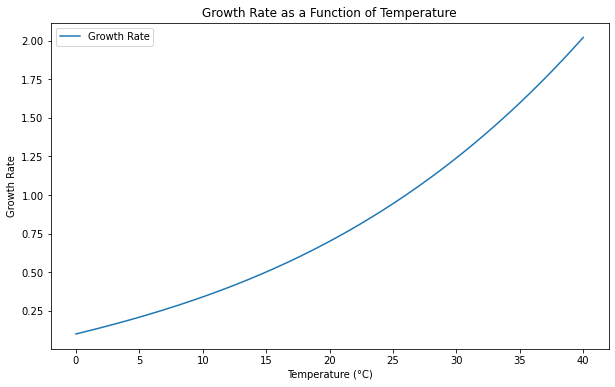

In [13]:
# Temperature range
temperatures = np.linspace(0, 40, 400)  # Example range of temperatures

# Calculate growth rates for each temperature
growth_rates = growth_rate(temperatures)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(temperatures, growth_rates, label='Growth Rate')
plt.xlabel('Temperature (°C)')
plt.ylabel('Growth Rate')
plt.title('Growth Rate as a Function of Temperature')
plt.legend()
plt.show()


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.



Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
import pandas as pd

# Define the criteria and alternatives
microhabitats = ['Shrub', 'Open', 'Burrow']
behaviors = ['Rest', 'Thermoregulate', 'Forage']

# Define weights for behaviors
weights = {
    'Rest': 0.4,
    'Thermoregulate': 0.3,
    'Forage': 0.3
}

# Define the availability of each microhabitat
availability = {
    'Shrub': 0.4,
    'Open': 0.1,
    'Burrow': 1
}

# Define utility scores for behaviors in different microhabitats
utility_scores = {
    'Shrub': {
        'Rest': 0,
        'Thermoregulate': 4,
        'Forage': 4
    },
    'Open': {
        'Rest': 0,
        'Thermoregulate': 4,
        'Forage': 4
    },
    'Burrow': {
        'Rest': 5,
        'Thermoregulate': 5,
        'Forage': 0
    }
}

# Number of snakes
num_snakes = 100

# Function to calculate overall utility using additive method
def calculate_overall_utility_additive(utility_scores, availability, weights):
    overall_utility = {}
    for habitat in utility_scores:
        habitat_utilities = []
        for behavior in utility_scores[habitat]:
            habitat_utilities.append(utility_scores[habitat][behavior] * weights[behavior])
        overall_utility[habitat] = sum(habitat_utilities) * availability[habitat]
    return overall_utility

# Function to calculate overall utility using multiplicative method
def calculate_overall_utility_multiplicative(utility_scores, availability, weights, epsilon=1e-10):
    overall_utility = {}
    for habitat in utility_scores:
        habitat_utilities = []
        for behavior in utility_scores[habitat]:
            habitat_utilities.append(utility_scores[habitat][behavior] ** weights[behavior])
        overall_utility[habitat] = np.prod(habitat_utilities) * availability[habitat] + epsilon
    return overall_utility

# Calculate overall utilities for each microhabitat using additive utility function
overall_utility_additive = calculate_overall_utility_additive(utility_scores, availability, weights)

# Calculate overall utilities for each microhabitat using multiplicative utility function
overall_utility_multiplicative = calculate_overall_utility_multiplicative(utility_scores, availability, weights)

# Function to simulate snake decisions
def simulate_snake_decisions(num_snakes, overall_utility, behaviors, utility_scores):
    decisions = []
    for _ in range(num_snakes):
        # Choose microhabitat based on overall utility
        habitat_probs = np.array(list(overall_utility.values()))
        habitat_probs /= np.sum(habitat_probs)
        microhabitat = np.random.choice(list(overall_utility.keys()), p=habitat_probs)
        
        # Choose behavior within the selected microhabitat
        behavior_utilities = [utility_scores[microhabitat][behavior] for behavior in behaviors]
        behavior_probs = np.array(behavior_utilities) / np.sum(behavior_utilities)
        behavior = np.random.choice(behaviors, p=behavior_probs)
        
        decisions.append((microhabitat, behavior))
    return decisions

# Simulate snake decisions using the additive utility function
decisions_additive = simulate_snake_decisions(num_snakes, overall_utility_additive, behaviors, utility_scores)

# Simulate snake decisions using the multiplicative utility function
decisions_multiplicative = simulate_snake_decisions(num_snakes, overall_utility_multiplicative, behaviors, utility_scores)

# Convert decisions to DataFrame for analysis
df_decisions_additive = pd.DataFrame(decisions_additive, columns=['Microhabitat', 'Behavior'])
df_decisions_multiplicative = pd.DataFrame(decisions_multiplicative, columns=['Microhabitat', 'Behavior'])

# Print the decision counts
print("Additive Utility Decisions:")
print(df_decisions_additive.value_counts())
print("\nMultiplicative Utility Decisions:")
print(df_decisions_multiplicative.value_counts())


Additive Utility Decisions:
Microhabitat  Behavior      
Burrow        Rest              42
              Thermoregulate    38
Shrub         Forage             9
              Thermoregulate     8
Open          Thermoregulate     2
              Forage             1
Name: count, dtype: int64

Multiplicative Utility Decisions:
Microhabitat  Behavior      
Burrow        Thermoregulate    27
Shrub         Thermoregulate    21
Open          Thermoregulate    14
              Forage            13
Shrub         Forage            13
Burrow        Rest              12
Name: count, dtype: int64


In [14]:
import numpy as np
import pandas as pd

# Define the criteria and alternatives
microhabitats = ['Shrub', 'Open', 'Burrow']
behaviors = ['Rest', 'Thermoregulate', 'Forage']

# Define the availability of each microhabitat
availability = {
    'Shrub': 0.8,
    'Open': 0.2,
    'Burrow': 1.0
}

# Define utility scores for behaviors in different microhabitats, including negative scores for costs
utility_scores = {
    'Shrub': {
        'Rest': 0,
        'Thermoregulate': 4,
        'Forage': 4
    },
    'Open': {
        'Rest': 0,
        'Thermoregulate': 4,
        'Forage': 4
    },
    'Burrow': {
        'Rest': 5,
        'Thermoregulate': 5,
        'Forage': 0
    }
}
# Number of snakes
num_snakes = 100

# Generate individual-specific weights for behaviors
def generate_individual_weights(num_snakes):
    weights = []
    for _ in range(num_snakes):
        rest_weight = np.random.uniform(0.2, 0.5)
        thermoregulate_weight = np.random.uniform(0.2, 0.5)
        forage_weight = 1 - rest_weight - thermoregulate_weight
        weights.append({
            'Rest': rest_weight,
            'Thermoregulate': thermoregulate_weight,
            'Forage': forage_weight
        })
    return weights

individual_weights = generate_individual_weights(num_snakes)

# Define different utility functions
def linear_utility(x, a=0, b=1):
    return a + b * x

def additive_utility(utilities, weights):
    return sum(w * u for w, u in zip(weights, utilities))

def multiplicative_utility(utilities, weights, epsilon=1e-10):
    return np.prod([max(u, epsilon) ** w for u, w in zip(utilities, weights)])

def exponential_utility(x, a=1):
    return 1 - np.exp(-a * x)

# Function to calculate overall utility using a combination of utility functions
def calculate_combined_utility(utility_scores, availability, individual_weight):
    overall_utility = {}
    for habitat in utility_scores:
        habitat_utilities = []
        for behavior in utility_scores[habitat]:
            linear_part = linear_utility(utility_scores[habitat][behavior])
            exp_part = exponential_utility(utility_scores[habitat][behavior])
            habitat_utilities.append(individual_weight[behavior] * (linear_part + exp_part))
        
        additive_part = additive_utility(habitat_utilities, list(individual_weight.values()))
        multiplicative_part = multiplicative_utility(habitat_utilities, list(individual_weight.values()))
        
        overall_utility[habitat] = (additive_part + multiplicative_part) * availability[habitat]
    return overall_utility

# Function to simulate snake decisions
def simulate_snake_decisions(num_snakes, individual_weights, behaviors, utility_scores, availability):
    decisions = []
    for i in range(num_snakes):
        individual_weight = individual_weights[i]
        overall_utility = calculate_combined_utility(utility_scores, availability, individual_weight)
        
        # Choose microhabitat based on overall utility
        habitat_probs = np.array(list(overall_utility.values()))
        habitat_probs /= np.sum(habitat_probs)
        microhabitat = np.random.choice(list(overall_utility.keys()), p=habitat_probs)
        
        # Choose behavior within the selected microhabitat
        behavior_utilities = [utility_scores[microhabitat][behavior] for behavior in behaviors]
        behavior_probs = np.array(behavior_utilities) / np.sum(behavior_utilities)
        behavior = np.random.choice(behaviors, p=behavior_probs)
        
        decisions.append((microhabitat, behavior))
    return decisions

# Simulate snake decisions using the individual-specific weights
decisions_combined = simulate_snake_decisions(num_snakes, individual_weights, behaviors, utility_scores, availability)

# Convert decisions to DataFrame for analysis
df_decisions_combined = pd.DataFrame(decisions_combined, columns=['Microhabitat', 'Behavior'])

# Print the decision counts
print("Combined Utility Decisions with Individual-Specific Weights:")
print(df_decisions_combined.value_counts())

Combined Utility Decisions with Individual-Specific Weights:
Microhabitat  Behavior      
Burrow        Rest              31
              Thermoregulate    30
Shrub         Thermoregulate    17
              Forage            13
Open          Forage             6
              Thermoregulate     3
Name: count, dtype: int64


In [5]:
%matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set up the parameters
r = 1.0      # Growth rate of prey
a = 0.1      # Predation rate coefficient
b = 0.1      # Reproduction rate of predators per prey eaten
m = 0.5      # Mortality rate of predators
D_N = 0.1    # Diffusion coefficient for prey
D_P = 0.05   # Diffusion coefficient for predators

# Set up the grid
size = 100          # Grid size
dx = 1.0            # Spatial step
dt = 0.01           # Time step
time_steps = 1000   # Number of time steps

# Initialize prey and predator populations
N = np.random.rand(size, size)  # Initial prey distribution
P = np.random.rand(size, size)  # Initial predator distribution

def laplacian(Z):
    """Compute the Laplacian of matrix Z"""
    return (np.roll(Z, 1, axis=0) + np.roll(Z, -1, axis=0) +
            np.roll(Z, 1, axis=1) + np.roll(Z, -1, axis=1) -
            4 * Z) / (dx ** 2)

# Set up the figure and axis
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

def update(frame):
    global N, P
    # Compute the Laplacians
    lap_N = laplacian(N)
    lap_P = laplacian(P)
    
    # Update equations
    dNdt = D_N * lap_N + r * N - a * N * P
    dPdt = D_P * lap_P + b * N * P - m * P
    
    # Update populations
    N += dNdt * dt
    P += dPdt * dt
    
    # Clear the previous frame
    ax[0].cla()
    ax[1].cla()
    
    # Plot prey population
    ax[0].imshow(N, cmap='viridis', vmin=0, vmax=2)
    ax[0].set_title("Prey Population")
    ax[0].axis('off')
    
    # Plot predator population
    ax[1].imshow(P, cmap='plasma', vmin=0, vmax=2)
    ax[1].set_title("Predator Population")
    ax[1].axis('off')

# Animate the simulation
ani = FuncAnimation(fig, update, frames=time_steps, interval=50)

plt.show()


Using matplotlib backend: TkAgg


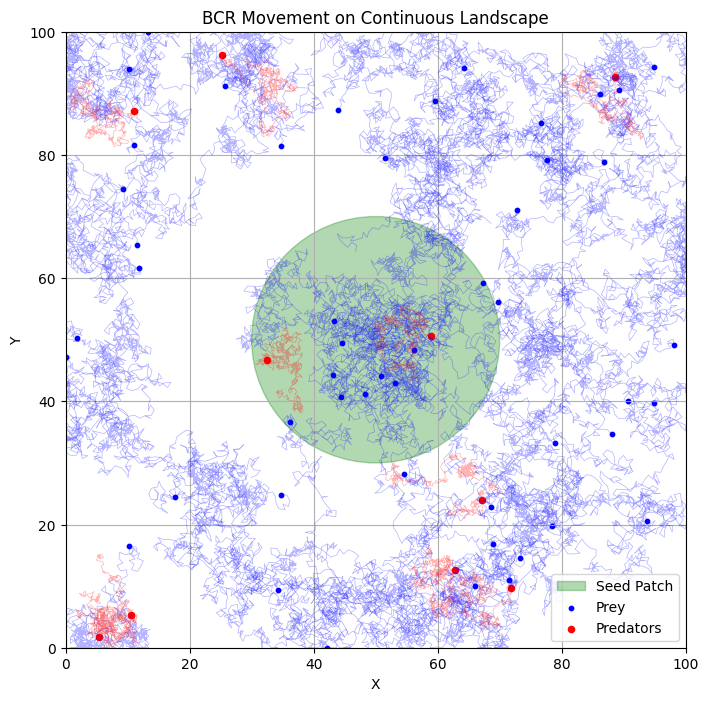

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
num_steps = 500  # Number of time steps
num_prey = 50    # Number of prey agents
num_predators = 10  # Number of predator agents
landscape_size = 100  # Landscape dimensions (100x100)

# Initialize positions
prey_positions = np.random.uniform(0, landscape_size, (num_prey, 2))
predator_positions = np.random.uniform(0, landscape_size, (num_predators, 2))

# Initialize velocity and direction
prey_velocities = np.zeros((num_prey, 2))
predator_velocities = np.zeros((num_predators, 2))

# Define movement parameters
prey_speed = 1.0
predator_speed = 0.5
bias_strength_prey = 0.05  # Bias strength towards seed patches
bias_strength_predator = 0.1  # Bias strength towards prey

# Create a dummy seed patch (for simplicity)
seed_patch_center = np.array([50, 50])
seed_patch_radius = 20

# Function to calculate bias for prey
def prey_bias(position):
    direction_to_patch = seed_patch_center - position
    distance = np.linalg.norm(direction_to_patch)
    if distance < seed_patch_radius:
        return bias_strength_prey * direction_to_patch / (distance + 1e-6)
    return np.zeros(2)

# Function to calculate bias for predators
def predator_bias(position, prey_positions):
    # Bias toward the closest prey
    distances = np.linalg.norm(prey_positions - position, axis=1)
    closest_prey_idx = np.argmin(distances)
    direction_to_prey = prey_positions[closest_prey_idx] - position
    return bias_strength_predator * direction_to_prey / (np.linalg.norm(direction_to_prey) + 1e-6)

# Simulation loop
prey_trajectories = [prey_positions.copy()]
predator_trajectories = [predator_positions.copy()]

for step in range(num_steps):
    # Update prey positions
    for i in range(num_prey):
        random_direction = np.random.uniform(-1, 1, 2)
        random_direction /= np.linalg.norm(random_direction)
        bias = prey_bias(prey_positions[i])
        prey_velocities[i] = prey_speed * (random_direction + bias)
        prey_positions[i] += prey_velocities[i]
    
    # Update predator positions
    for j in range(num_predators):
        random_direction = np.random.uniform(-1, 1, 2)
        random_direction /= np.linalg.norm(random_direction)
        bias = predator_bias(predator_positions[j], prey_positions)
        predator_velocities[j] = predator_speed * (random_direction + bias)
        predator_positions[j] += predator_velocities[j]
    
    # Enforce boundaries
    prey_positions = np.clip(prey_positions, 0, landscape_size)
    predator_positions = np.clip(predator_positions, 0, landscape_size)
    
    # Store trajectories
    prey_trajectories.append(prey_positions.copy())
    predator_trajectories.append(predator_positions.copy())

# Convert trajectories to arrays for plotting
prey_trajectories = np.array(prey_trajectories)
predator_trajectories = np.array(predator_trajectories)

# Visualization
plt.figure(figsize=(8, 8))
plt.xlim(0, landscape_size)
plt.ylim(0, landscape_size)

# Plot seed patch
seed_patch = plt.Circle(seed_patch_center, seed_patch_radius, color='green', alpha=0.3, label='Seed Patch')
plt.gca().add_patch(seed_patch)

# Plot prey and predator trajectories
for i in range(num_prey):
    plt.plot(prey_trajectories[:, i, 0], prey_trajectories[:, i, 1], color='blue', alpha=0.3, lw=0.5)
plt.scatter(prey_positions[:, 0], prey_positions[:, 1], color='blue', label='Prey', s=10)

for j in range(num_predators):
    plt.plot(predator_trajectories[:, j, 0], predator_trajectories[:, j, 1], color='red', alpha=0.3, lw=0.5)
plt.scatter(predator_positions[:, 0], predator_positions[:, 1], color='red', label='Predators', s=20)

plt.legend()
plt.title("BCR Movement on Continuous Landscape")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()
